What is the average number of steps before the first reward is obtained across all successful episodes when playing 100 random action trials in Frozen Lake 1.

In this experiment, I'm testing how long it takes in steps for a completely random agent to reach the goal and receive a reward in the Frozen Lake environment from gymnasiums Toy Text collection. The Frozen Lake 1 environment is a simple 4 x 4 grid world. The agent starts at the top-left corner and must reach the goal without falling into holes. Each episode ends when the agent either falls into a hole, reaches the goal, or hits the maximum step limit.

🏔️ Running 1000 random-action episodes in FrozenLake-v1...

📊 --- Quantitative Results ---
Successful episodes: 16 / 1000 (1.6%)
Average steps to first reward: 13.69
Median steps to first reward:  12.50
Minimum steps:                7
Maximum steps:                23
Standard deviation:           5.01


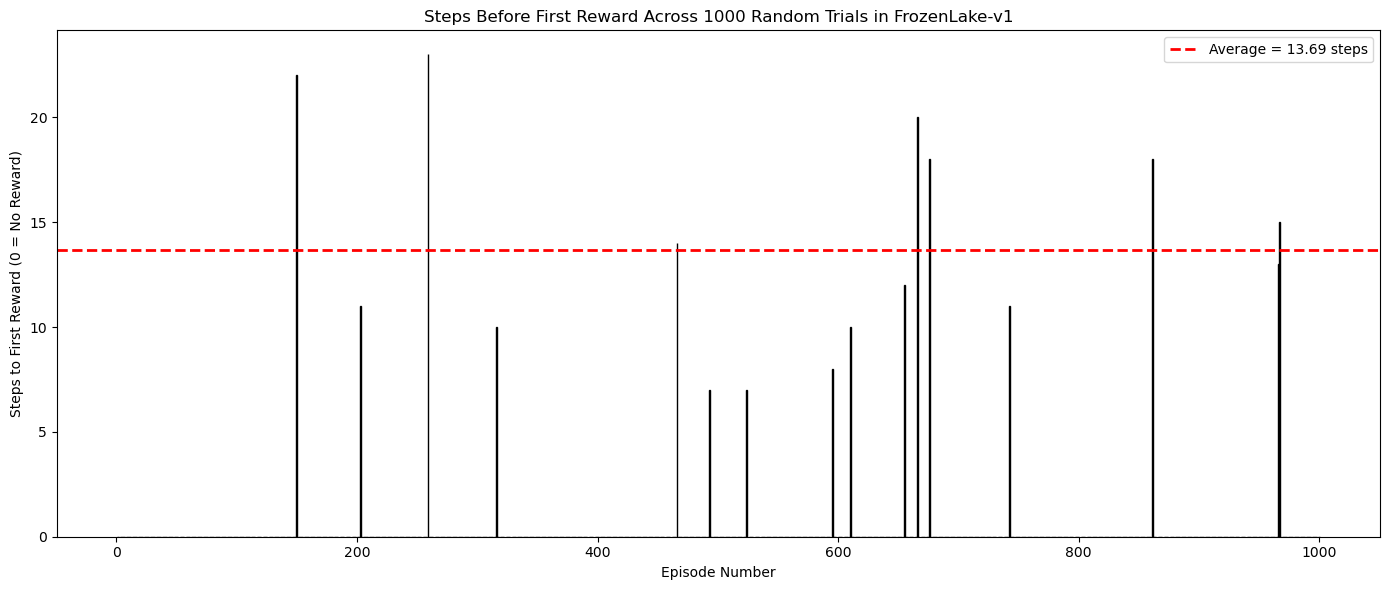

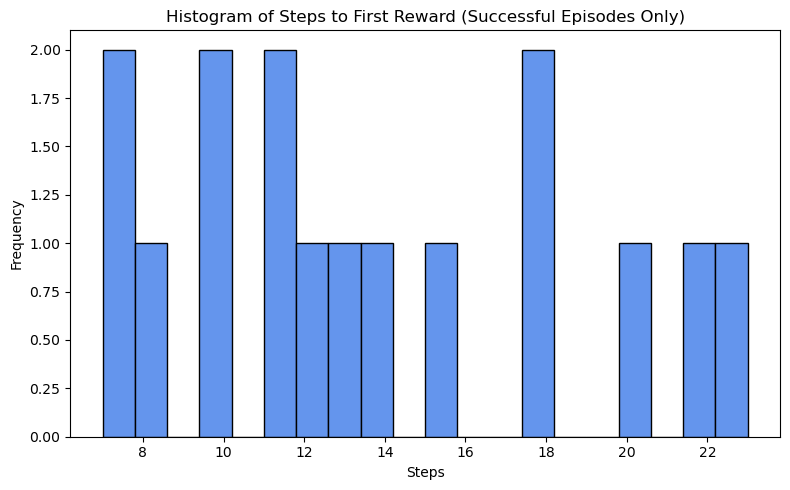


🧠 --- Qualitative Analysis ---
• The agent succeeded in 1.6% of episodes (blue bars).
• Most trials failed to obtain any reward, shown by gray bars at 0 height.
• The average successful episode required ~13.69 steps before reaching the goal.
• The red dashed line indicates this average on the graph.
• The histogram shows that even successful runs vary in how quickly they find the reward.
• Overall, the environment is very unforgiving to random behavior.

✅ --- Conclusion ---
Out of 1,000 episodes, the agent reached the goal 1.6% of the time. On average, successful episodes took about 13.69 steps to get the first reward. This confirms that while success is possible, it is rare and inconsistent — FrozenLake strongly rewards strategic planning over random movement.


In [5]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# --- Experiment Setup ---
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=True)
n_episodes = 1000
max_steps = 100
steps_to_reward = []

print(f"🏔️ Running {n_episodes} random-action episodes in FrozenLake-v1...\n")

for episode in range(n_episodes):
    observation, info = env.reset()
    got_reward = False

    for step in range(max_steps):
        action = env.action_space.sample()
        observation, reward, terminated, truncated, info = env.step(action)

        if reward != 0 and not got_reward:
            steps_to_reward.append(step + 1)
            got_reward = True
            break

        if terminated or truncated:
            break

    if not got_reward:
        steps_to_reward.append(np.nan)

env.close()

# --- Quantitative Data ---
valid_steps = [s for s in steps_to_reward if not np.isnan(s)]
num_success = len(valid_steps)
success_rate = num_success / n_episodes * 100

print("📊 --- Quantitative Results ---")
if num_success > 0:
    avg_steps = np.mean(valid_steps)
    median_steps = np.median(valid_steps)
    min_steps = np.min(valid_steps)
    max_steps = np.max(valid_steps)
    std_steps = np.std(valid_steps)

    print(f"Successful episodes: {num_success} / {n_episodes} ({success_rate:.1f}%)")
    print(f"Average steps to first reward: {avg_steps:.2f}")
    print(f"Median steps to first reward:  {median_steps:.2f}")
    print(f"Minimum steps:                {min_steps}")
    print(f"Maximum steps:                {max_steps}")
    print(f"Standard deviation:           {std_steps:.2f}")
else:
    avg_steps = np.nan
    print("⚠️ No rewards obtained in any episode.")

# --- Visualization (show all 1000 trials) ---
plt.figure(figsize=(14, 6))

# Colors: blue = success, gray = no reward
colors = ["skyblue" if not np.isnan(s) else "lightgray" for s in steps_to_reward]

# Replace NaN with 0 for plotting (so failures show as zero)
plot_steps = [0 if np.isnan(s) else s for s in steps_to_reward]

bars = plt.bar(range(1, n_episodes + 1), plot_steps, color=colors, edgecolor='black')
plt.xlabel("Episode Number")
plt.ylabel("Steps to First Reward (0 = No Reward)")
plt.title(f"Steps Before First Reward Across {n_episodes} Random Trials in FrozenLake-v1")

# Add average line if there were successful episodes
if num_success > 0:
    plt.axhline(y=avg_steps, color='red', linestyle='--', linewidth=2,
                label=f"Average = {avg_steps:.2f} steps")
    plt.legend()

plt.tight_layout()
plt.show()

# --- Histogram of Successful Episodes ---
if num_success > 0:
    plt.figure(figsize=(8, 5))
    plt.hist(valid_steps, bins=20, color='cornflowerblue', edgecolor='black')
    plt.title("Histogram of Steps to First Reward (Successful Episodes Only)")
    plt.xlabel("Steps")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# --- Qualitative Analysis ---
print("\n🧠 --- Qualitative Analysis ---")

if success_rate == 0:
    print("• None of the 1,000 random episodes reached the goal (all gray bars).")
    print("• Random movement provides no meaningful progress in FrozenLake.")
    print("• The slippery mechanics and sparse reward signal make success by chance nearly impossible.")
else:
    print(f"• The agent succeeded in {success_rate:.1f}% of episodes (blue bars).")
    print("• Most trials failed to obtain any reward, shown by gray bars at 0 height.")
    print(f"• The average successful episode required ~{avg_steps:.2f} steps before reaching the goal.")
    print("• The red dashed line indicates this average on the graph.")
    print("• The histogram shows that even successful runs vary in how quickly they find the reward.")
    print("• Overall, the environment is very unforgiving to random behavior.")

# --- Final Conclusion ---
print("\n✅ --- Conclusion ---")
if success_rate == 0:
    print("In 1,000 random trials, the agent failed to obtain any rewards. "
          "Random exploration in FrozenLake is ineffective due to slipperiness and sparse feedback.")
else:
    print(f"Out of 1,000 episodes, the agent reached the goal {success_rate:.1f}% of the time. "
          f"On average, successful episodes took about {avg_steps:.2f} steps to get the first reward. "
          "This confirms that while success is possible, it is rare and inconsistent — "
          "FrozenLake strongly rewards strategic planning over random movement.")
